In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import savemat
from scipy.stats import gaussian_kde
from scipy.io import loadmat
import h5py
import chaospy as cp
import numpoly
import UQpy as uq
import seaborn as sns

In [36]:
### GENERATE MONTE CARLO INPUTS FOR E_hard & E_soft ###
np.random.seed(1)

N_MC2 = 100
N_MC3 = 1000
N_MC4 = 10000

E_h_mean = 200e9
E_h_range = 20e9
E_s_mean = 200e6
E_s_range = 180e6

# define the distributions of each input, and joint distribution
E_hard_dist = uq.Uniform(loc=E_h_mean-E_h_range, scale=E_h_mean+E_h_range)
E_soft_dist = uq.Uniform(loc=E_s_mean-E_s_range, scale=E_s_mean+E_s_range)

E_joint_dist = uq.JointIndependent(marginals=[E_hard_dist, E_soft_dist])

In [37]:
E_hard_sample_sets = [None]*3
E_hard_uniform_file_100 = loadmat('uniform_100/E_hard_uniform_100.mat')
E_hard_uniform_file_1000 = loadmat('uniform_1000/E_hard_uniform_1000.mat')
E_hard_uniform_file_10000 = loadmat('uniform_10000/E_hard_uniform_10000.mat')
E_hard_uniform_100 = E_hard_uniform_file_100['E_hard'][:].T
E_hard_uniform_1000 = E_hard_uniform_file_1000['E_hard'][:].T
E_hard_uniform_10000 = E_hard_uniform_file_10000['E_hard'][:].T
E_hard_sample_sets[0] = E_hard_uniform_100
E_hard_sample_sets[1] = E_hard_uniform_1000
E_hard_sample_sets[2] = E_hard_uniform_10000

E_soft_sample_sets = [None]*3
E_soft_uniform_file_100 = loadmat('uniform_100/E_soft_uniform_100.mat')
E_soft_uniform_file_1000 = loadmat('uniform_1000/E_soft_uniform_1000.mat')
E_soft_uniform_file_10000 = loadmat('uniform_10000/E_soft_uniform_10000.mat')
E_soft_uniform_100 = E_soft_uniform_file_100['E_soft'][:].T
E_soft_uniform_1000 = E_soft_uniform_file_1000['E_soft'][:].T
E_soft_uniform_10000 = E_soft_uniform_file_10000['E_soft'][:].T
E_soft_sample_sets[0] = E_soft_uniform_100
E_soft_sample_sets[1] = E_soft_uniform_1000
E_soft_sample_sets[2] = E_soft_uniform_10000

print(len(E_hard_sample_sets[0]), len(E_hard_sample_sets[1]), len(E_hard_sample_sets[2]))
print(len(E_soft_sample_sets[0]), len(E_soft_sample_sets[1]), len(E_soft_sample_sets[2]))

100 1000 10000
100 1000 10000


In [38]:
### SAVE INPUTS TO SEND OFF TO BLACK BOX MATLAB MODEL ###
# for sample_set in E_hard_sample_sets:
#     savemat('E_hard_uniform_'+str(len(sample_set))+'.mat', {'E_hard': sample_set})
# for sample_set in E_soft_sample_sets:
#     savemat('E_soft_uniform_'+str(len(sample_set))+'.mat', {'E_soft': sample_set})

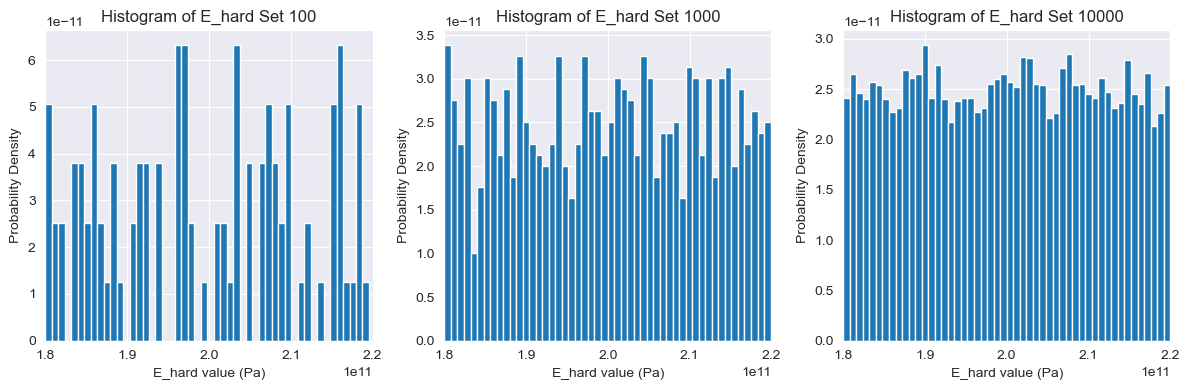

In [39]:
### PLOT OF INPUT DATA ###
# create subplots for the histograms
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# plot the histograms in each subplot
num_bins = 50
for i, sample_set in enumerate(E_hard_sample_sets):
    ax = axes[i]
    n, bins, patches = ax.hist(sample_set, bins=num_bins, density=True)

    # add labels and a title to the plot
    ax.set_xlabel('E_hard value (Pa)')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'Histogram of E_hard Set {10**(i+2)}')

    # set the x-axis limits
    ax.set_xlim([E_h_mean-E_h_range, E_h_mean+E_h_range])

plt.tight_layout()
plt.show()

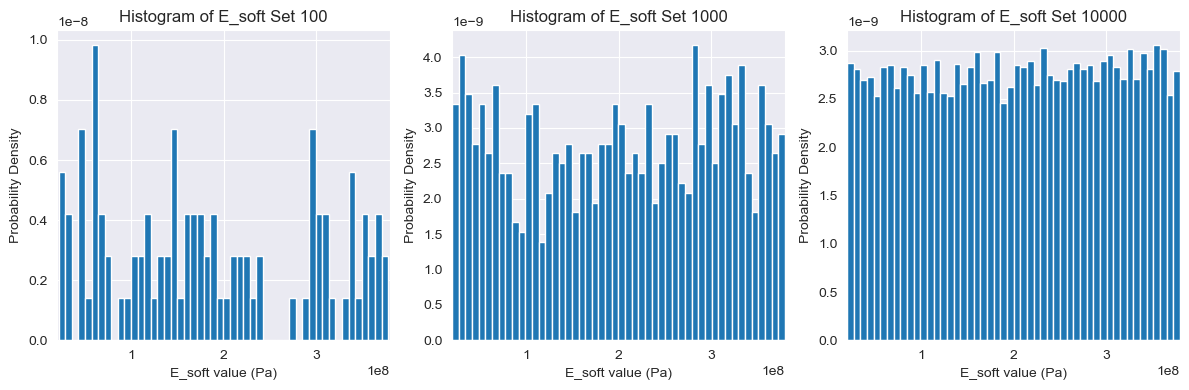

In [69]:
# create subplots for the histograms
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# plot the histograms in each subplot
num_bins = 50
for i, sample_set in enumerate(E_soft_sample_sets):
    ax = axes[i]
    n, bins, patches = ax.hist(sample_set, bins=num_bins, density=True)

    # add labels and a title to the plot
    ax.set_xlabel('E_soft value (Pa)')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'Histogram of E_soft Set {10**(i+2)}')

    # set the x-axis limits
    ax.set_xlim([E_s_mean-E_s_range, E_s_mean+E_s_range])

plt.tight_layout()
plt.show()

In [41]:
### LOAD MATLAB RESULTS ###
bg_size_sample_sets = [None]*3
bg_top_sample_sets = [None]*3
bg_bottom_sample_sets = [None]*3

#100 sample results
bg_size_file_100 = loadmat('uniform_100/bg_size_uniform_100_resave.mat')
bg_bottom_file_100 = loadmat('uniform_100/bg_bottom_uniform_100_resave.mat')
bg_top_file_100 = loadmat('uniform_100/bg_top_uniform_100_resave.mat')
bg_size_100 = bg_size_file_100['bg_size'][:]
bg_top_100 = bg_top_file_100['bg_top'][:]
bg_bottom_100 = bg_bottom_file_100['bg_bottom'][:]
bg_size_sample_sets[0] = bg_size_100
bg_top_sample_sets[0] = bg_top_100
bg_bottom_sample_sets[0] = bg_bottom_100

#1000 sample results
bg_size_file_1000 = loadmat('uniform_1000/bg_size_uniform_1000_resave.mat')
bg_bottom_file_1000 = loadmat('uniform_1000/bg_bottom_uniform_1000_resave.mat')
bg_top_file_1000 = loadmat('uniform_1000/bg_top_uniform_1000_resave.mat')
bg_size_1000 = bg_size_file_1000['bg_size'][:]
bg_top_1000 = bg_top_file_1000['bg_top'][:]
bg_bottom_1000 = bg_bottom_file_1000['bg_bottom'][:]
bg_size_sample_sets[1] = bg_size_1000
bg_top_sample_sets[1] = bg_top_1000
bg_bottom_sample_sets[1] = bg_bottom_1000

#10000 sample results
bg_size_file_10000 = loadmat('uniform_10000/bg_size_uniform_10000_resave.mat')
bg_bottom_file_10000 = loadmat('uniform_10000/bg_bottom_uniform_10000_resave.mat')
bg_top_file_10000 = loadmat('uniform_10000/bg_top_uniform_10000_resave.mat')
bg_size_10000 = bg_size_file_10000['bg_size'][:]
bg_top_10000 = bg_top_file_10000['bg_top'][:]
bg_bottom_10000 = bg_bottom_file_10000['bg_bottom'][:]
bg_size_sample_sets[2] = bg_size_10000
bg_top_sample_sets[2] = bg_top_10000
bg_bottom_sample_sets[2] = bg_bottom_10000

Text(0.5, 0, 'bg_size')

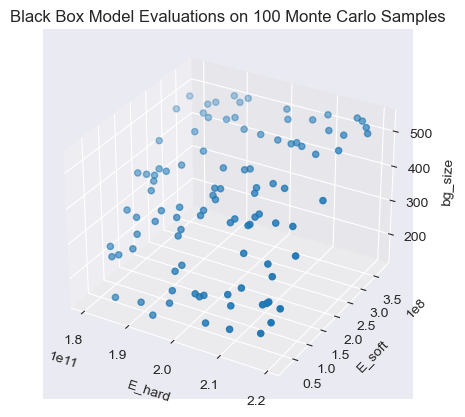

In [55]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.scatter(E_hard_sample_sets[0], E_soft_sample_sets[0], bg_size_sample_sets[0])
ax.set_title('Black Box Model Evaluations on '+str(len(E_hard_sample_sets[0]))+' Monte Carlo Samples')
ax.set_xlabel('E_hard')
ax.set_ylabel('E_soft')
ax.set_zlabel('bg_size')
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

Text(0.5, 0, 'bg_size')

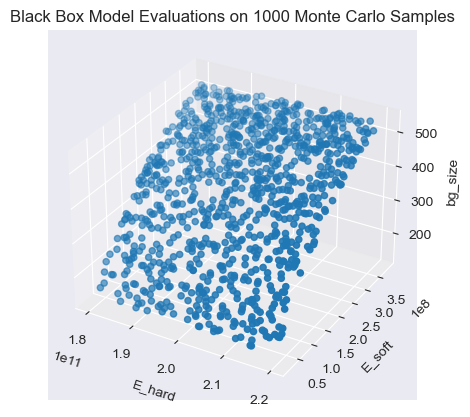

In [56]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.scatter(E_hard_sample_sets[1], E_soft_sample_sets[1], bg_size_sample_sets[1])
ax.set_title('Black Box Model Evaluations on '+str(len(E_hard_sample_sets[1]))+' Monte Carlo Samples')
ax.set_xlabel('E_hard')
ax.set_ylabel('E_soft')
ax.set_zlabel('bg_size')
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

Text(0.5, 0, 'bg_size')

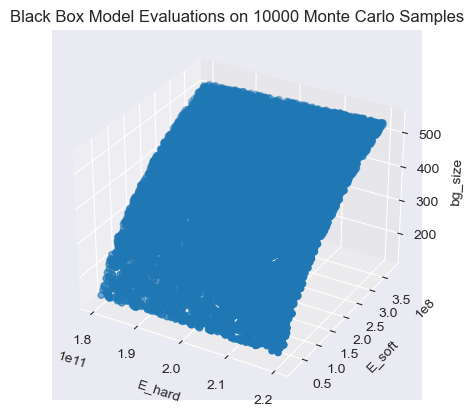

In [57]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.scatter(E_hard_sample_sets[2], E_soft_sample_sets[2], bg_size_sample_sets[2])
ax.set_title('Black Box Model Evaluations on '+str(len(E_hard_sample_sets[2]))+' Monte Carlo Samples')
ax.set_xlabel('E_hard')
ax.set_ylabel('E_soft')
ax.set_zlabel('bg_size')
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

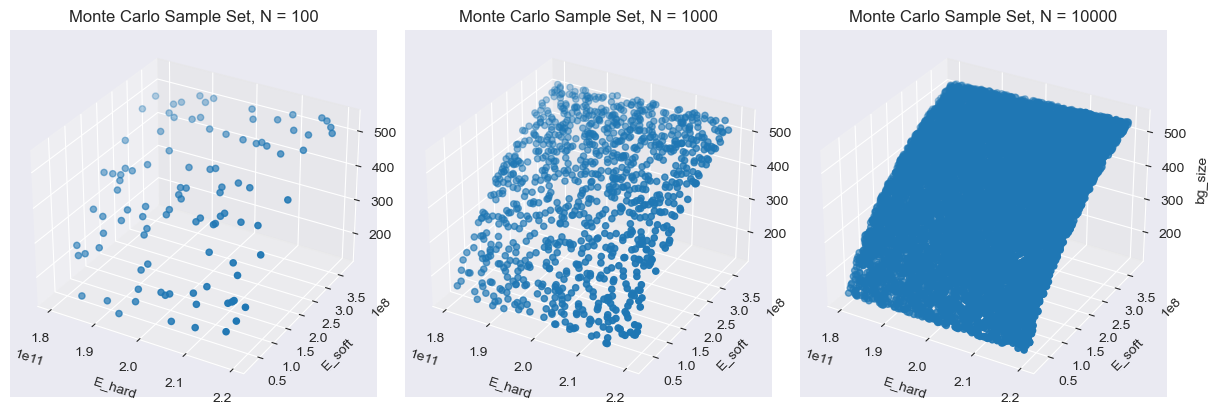

In [72]:
# Create a single row with three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4), subplot_kw={'projection': '3d'})

ax = axs[0]
ax.scatter(E_hard_sample_sets[0], E_soft_sample_sets[0], bg_size_sample_sets[0])
ax.set_title('Monte Carlo Sample Set, N = '+str(len(E_hard_sample_sets[0])))
ax.set_xlabel('E_hard')
ax.set_ylabel('E_soft')
ax.set_zlabel('bg_size')

# Plot the second 3D scatter plot
ax = axs[1]
ax.scatter(E_hard_sample_sets[1], E_soft_sample_sets[1], bg_size_sample_sets[1])
ax.set_title('Monte Carlo Sample Set, N = '+str(len(E_hard_sample_sets[1])))
ax.set_xlabel('E_hard')
ax.set_ylabel('E_soft')
ax.set_zlabel('bg_size')

# Plot the third 3D scatter plot
ax = axs[2]
ax.scatter(E_hard_sample_sets[2], E_soft_sample_sets[2], bg_size_sample_sets[2])
ax.set_title('Monte Carlo Sample Set, N = '+str(len(E_hard_sample_sets[2])))
ax.set_xlabel('E_hard')
ax.set_ylabel('E_soft')
ax.set_zlabel('bg_size')

# Adjust the spacing between the subplots
fig.tight_layout()

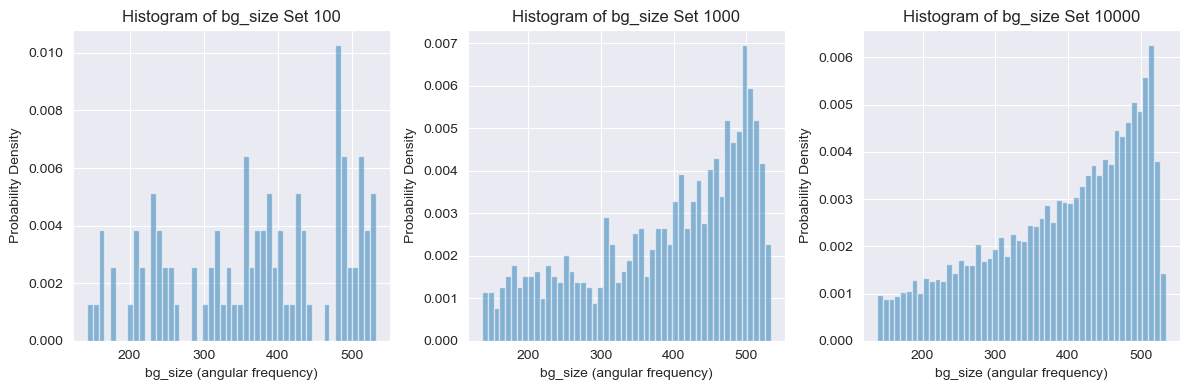

In [68]:
# create subplots for the histograms
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# plot the histograms in each subplot
num_bins = 50
for i, sample_set in enumerate(bg_size_sample_sets):
    ax = axes[i]
    ax.hist(sample_set, bins=50, density=True, alpha=0.5)

    # add labels and a title to the plot
    ax.set_xlabel('bg_size (angular frequency)')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'Histogram of bg_size Set {10**(i+2)}')

plt.tight_layout()


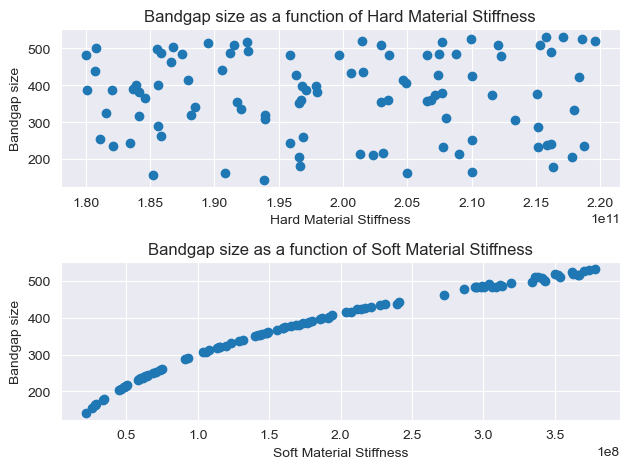

In [43]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

ax1.scatter(E_hard_sample_sets[0], bg_size_sample_sets[0])
ax1.set_xlabel('Hard Material Stiffness')
ax1.set_ylabel('Bandgap size')
ax1.set_title('Bandgap size as a function of Hard Material Stiffness')

ax2.scatter(E_soft_sample_sets[0], bg_size_sample_sets[0])
ax2.set_xlabel('Soft Material Stiffness')
ax2.set_ylabel('Bandgap size')
ax2.set_title('Bandgap size as a function of Soft Material Stiffness')

plt.tight_layout()

In [44]:
print('Correlation matrix between E_hard and BG_size:')
print(np.corrcoef(E_hard_sample_sets[0].flatten(), bg_size_sample_sets[0].flatten()))
print('Correlation matrix between E_soft and BG_size:')
print(np.corrcoef(E_soft_sample_sets[0].flatten(), bg_size_sample_sets[0].flatten()))

Correlation matrix between E_hard and BG_size:
[[ 1.         -0.00867935]
 [-0.00867935  1.        ]]
Correlation matrix between E_soft and BG_size:
[[1.        0.9764978]
 [0.9764978 1.       ]]


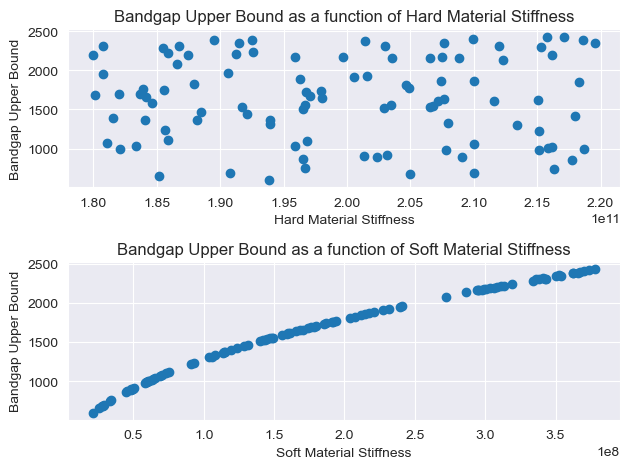

In [45]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

ax1.scatter(E_hard_sample_sets[0], bg_top_sample_sets[0])
ax1.set_xlabel('Hard Material Stiffness')
ax1.set_ylabel('Bandgap Upper Bound')
ax1.set_title('Bandgap Upper Bound as a function of Hard Material Stiffness')

ax2.scatter(E_soft_sample_sets[0], bg_top_sample_sets[0])
ax2.set_xlabel('Soft Material Stiffness')
ax2.set_ylabel('Bandgap Upper Bound')
ax2.set_title('Bandgap Upper Bound as a function of Soft Material Stiffness')

plt.tight_layout()

In [46]:
print('Correlation matrix between E_hard and BG_top:')
print(np.corrcoef(E_hard_sample_sets[0].flatten(), bg_top_sample_sets[0].flatten()))
print('Correlation matrix between E_soft and BG_top:')
print(np.corrcoef(E_soft_sample_sets[0].flatten(), bg_top_sample_sets[0].flatten()))

Correlation matrix between E_hard and BG_top:
[[ 1.         -0.01328222]
 [-0.01328222  1.        ]]
Correlation matrix between E_soft and BG_top:
[[1.         0.98572078]
 [0.98572078 1.        ]]


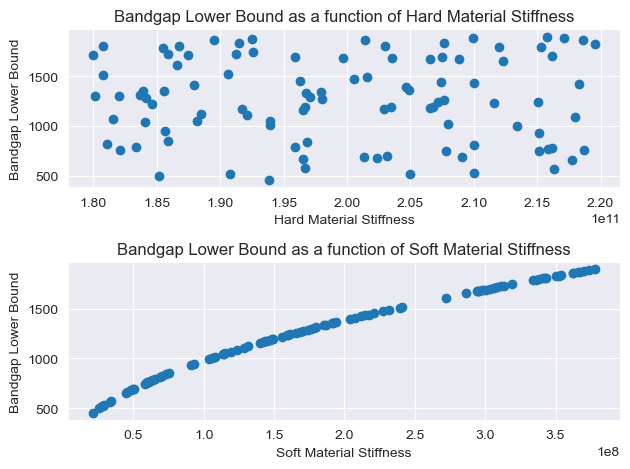

In [47]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

ax1.scatter(E_hard_sample_sets[0], bg_bottom_sample_sets[0])
ax1.set_xlabel('Hard Material Stiffness')
ax1.set_ylabel('Bandgap Lower Bound')
ax1.set_title('Bandgap Lower Bound as a function of Hard Material Stiffness')

ax2.scatter(E_soft_sample_sets[0], bg_bottom_sample_sets[0])
ax2.set_xlabel('Soft Material Stiffness')
ax2.set_ylabel('Bandgap Lower Bound')
ax2.set_title('Bandgap Lower Bound as a function of Soft Material Stiffness')

plt.tight_layout()

In [73]:
print('Correlation matrix between E_hard and BG_top:')
print(np.corrcoef(E_hard_sample_sets[2].flatten(), bg_size_sample_sets[2].flatten()))
print('Correlation matrix between E_soft and BG_top:')
print(np.corrcoef(E_soft_sample_sets[2].flatten(), bg_top_sample_sets[2].flatten()))

Correlation matrix between E_hard and BG_top:
[[ 1.         -0.00397994]
 [-0.00397994  1.        ]]
Correlation matrix between E_soft and BG_top:
[[1.         0.98613431]
 [0.98613431 1.        ]]


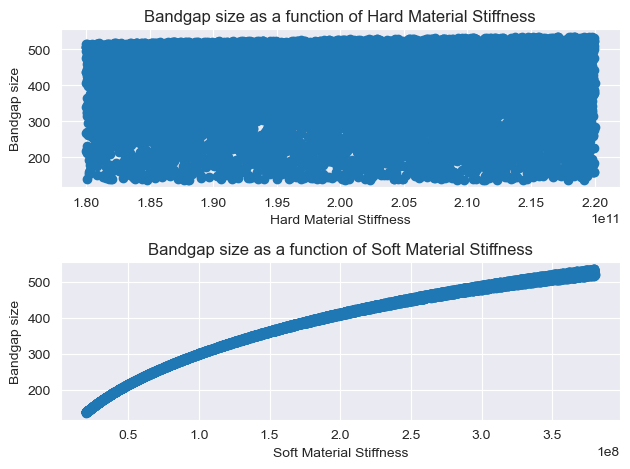

In [74]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

ax1.scatter(E_hard_sample_sets[2], bg_size_sample_sets[2])
ax1.set_xlabel('Hard Material Stiffness')
ax1.set_ylabel('Bandgap size')
ax1.set_title('Bandgap size as a function of Hard Material Stiffness')

ax2.scatter(E_soft_sample_sets[2], bg_size_sample_sets[2])
ax2.set_xlabel('Soft Material Stiffness')
ax2.set_ylabel('Bandgap size')
ax2.set_title('Bandgap size as a function of Soft Material Stiffness')

plt.tight_layout()

In [48]:
print('Correlation matrix between E_hard and BG_bottom:')
print(np.corrcoef(E_hard_sample_sets[0].flatten(), bg_bottom_sample_sets[0].flatten()))
print('Correlation matrix between E_soft and BG_bottom:')
print(np.corrcoef(E_soft_sample_sets[0].flatten(), bg_bottom_sample_sets[0].flatten()))

Correlation matrix between E_hard and BG_bottom:
[[ 1.         -0.01449697]
 [-0.01449697  1.        ]]
Correlation matrix between E_soft and BG_bottom:
[[1.         0.98774818]
 [0.98774818 1.        ]]


In [49]:
### CREATE POLYNOMIAL BASIS AND FIT TO DATA ###
#collocation_schemes = ["gaussian"]
degrees = [2, 3, 4, 5, 6, 7, 8]
sample_set_surrogates = {}
case = 1
# create surrogate models of different polynomial orders
for i, sample_set in enumerate(E_hard_sample_sets):
    sc_surrogates = {}
    collocation_nodes = np.column_stack((E_hard_sample_sets[i], E_soft_sample_sets[i]))
    #collocation_nodes = np.vstack((E_soft_sample_sets[i], E_hard_sample_sets[i]))
    evaluations = bg_size_sample_sets[i]
    print(collocation_nodes.shape, evaluations.shape)
    for degree in degrees:
        polynomial_basis = uq.TensorProductBasis(distributions=E_joint_dist, max_degree=degree)
        least_squares = uq.LeastSquareRegression()
        pce = uq.PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)
        pce.fit(x=collocation_nodes, y=evaluations)
        sc_surrogates[degree] = pce
    sample_set_surrogates[i] = sc_surrogates
print(sample_set_surrogates.keys())
print(sample_set_surrogates[0].keys())

(100, 2) (100, 1)
(1000, 2) (1000, 1)
(10000, 2) (10000, 1)
dict_keys([0, 1, 2])
dict_keys([2, 3, 4, 5, 6, 7, 8])


In [50]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test = 1000
E_test = E_joint_dist.rvs(N_test)
print(E_test.shape)

surrogate_outputs = np.zeros((len(sample_set_surrogates),len(degrees),N_test))
surrogate_kdes = [None]*len(surrogate_outputs)
surrogate_pdf = np.zeros(shape=surrogate_outputs.shape)
order_offset = 2
print(surrogate_outputs.shape, len(surrogate_kdes), surrogate_pdf.shape)
for sample_set, models in sample_set_surrogates.items():
    #print(sample_set)
    surrogate_kdes[sample_set] = [None]*len(sample_set_surrogates[sample_set])
    for degree, model in models.items():
        #print(sample_set, degree)
        #print(model, type(model))
        surrogate_outputs[sample_set][degree-order_offset] = model.predict(E_test).flatten()
        surrogate_kdes[sample_set][degree-order_offset] = gaussian_kde(surrogate_outputs[sample_set][degree-order_offset])
        surrogate_pdf[sample_set][degree-order_offset] = surrogate_kdes[sample_set][degree-order_offset](np.linspace(np.min(surrogate_outputs[sample_set][degree-order_offset]), np.max(surrogate_outputs[sample_set][degree-order_offset]), 1000))

(1000, 2)
(3, 7, 1000) 3 (3, 7, 1000)


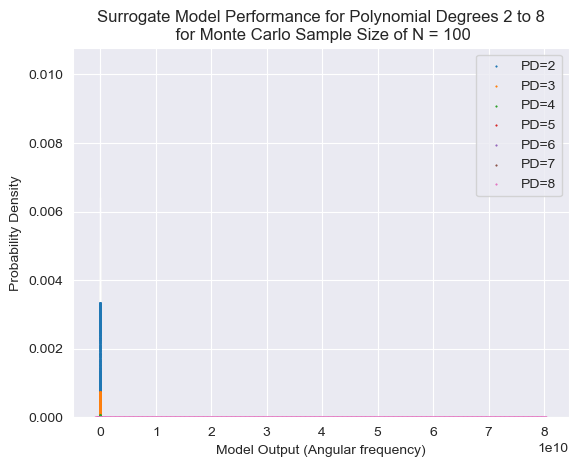

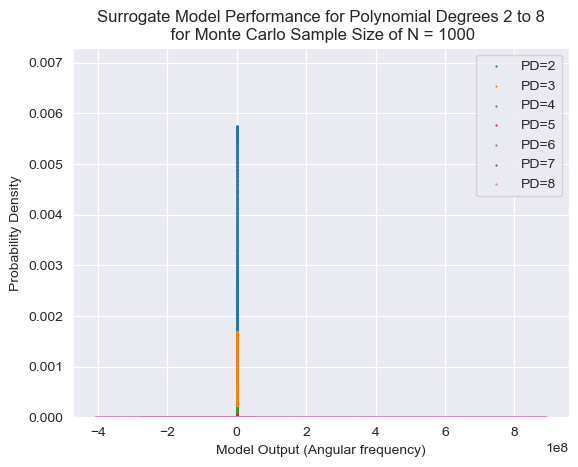

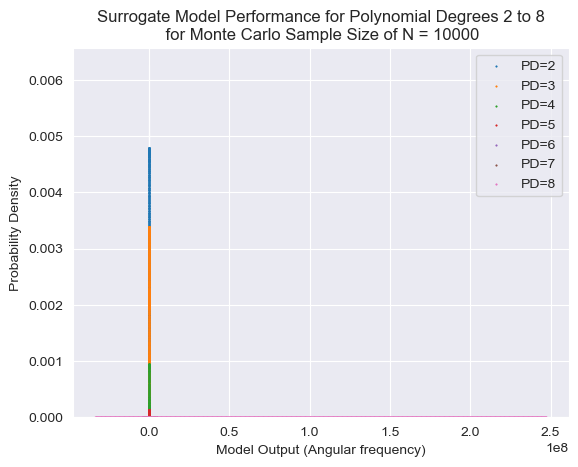

In [51]:
### PLOT SURROGATE PDF CONVERGENCE ###
for i, sample_set in enumerate(bg_size_sample_sets):
    plt.figure()
    plt.hist(sample_set, bins=50, density=True, alpha=0.5)
    for d_o, pdf in enumerate(surrogate_pdf[i]):
        plot_label = 'PD='+str(d_o+order_offset)
        plt.scatter(np.linspace(np.min(surrogate_outputs[i][d_o]), np.max(surrogate_outputs[i][d_o]), 1000), pdf, label=plot_label, s=1, linewidths=0.5)
    plt.xlabel("Model Output (Angular frequency)")
    plt.ylabel("Probability Density")
    title_str = 'Surrogate Model Performance for Polynomial Degrees 2 to 8\n for Monte Carlo Sample Size of N = '+ str(10**(i+2))
    plt.title(title_str)
    plt.legend(loc='best')

In [52]:
### CREATE POLYNOMIAL BASIS AND FIT TO DATA (ONLY E_soft) ###
#collocation_schemes = ["gaussian"]
degrees = [2, 3, 4, 5, 6, 7, 8]
sample_set_surrogates = {}
case = 1
# create surrogate models of different polynomial orders
for i, sample_set in enumerate(E_soft_sample_sets):
    sc_surrogates = {}
    collocation_nodes = E_soft_sample_sets[i]
    evaluations = bg_size_sample_sets[i]
    print(collocation_nodes.shape, evaluations.shape)
    for degree in degrees:
        polynomial_basis = uq.TotalDegreeBasis(distributions=E_soft_dist, max_degree=degree)
        least_squares = uq.LeastSquareRegression()
        pce = uq.PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)
        pce.fit(x=collocation_nodes, y=evaluations)
        sc_surrogates[degree] = pce
    sample_set_surrogates[i] = sc_surrogates
print(sample_set_surrogates.keys())
print(sample_set_surrogates[0].keys())

(100, 1) (100, 1)
(1000, 1) (1000, 1)
(10000, 1) (10000, 1)
dict_keys([0, 1, 2])
dict_keys([2, 3, 4, 5, 6, 7, 8])


In [53]:
N_test = 1000
E_test = E_soft_dist.rvs(N_test)
print(E_test.shape)

surrogate_outputs = np.zeros((len(sample_set_surrogates),len(degrees),N_test))
surrogate_kdes = [None]*len(surrogate_outputs)
surrogate_pdf = np.zeros(shape=surrogate_outputs.shape)
order_offset = 2
print(surrogate_outputs.shape, len(surrogate_kdes), surrogate_pdf.shape)
for sample_set, models in sample_set_surrogates.items():
    #print(sample_set)
    surrogate_kdes[sample_set] = [None]*len(sample_set_surrogates[sample_set])
    for degree, model in models.items():
        #print(sample_set, degree)
        #print(model, type(model))
        surrogate_outputs[sample_set][degree-order_offset] = model.predict(E_test).flatten()
        surrogate_kdes[sample_set][degree-order_offset] = gaussian_kde(surrogate_outputs[sample_set][degree-order_offset])
        surrogate_pdf[sample_set][degree-order_offset] = surrogate_kdes[sample_set][degree-order_offset](np.linspace(np.min(surrogate_outputs[sample_set][degree-order_offset]), np.max(surrogate_outputs[sample_set][degree-order_offset]), 1000))

(1000, 1)
(3, 7, 1000) 3 (3, 7, 1000)


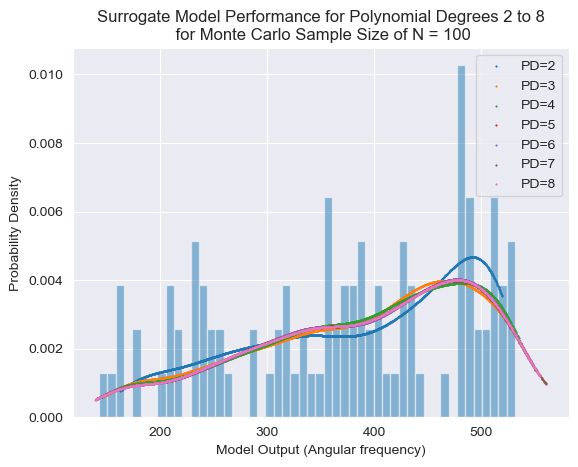

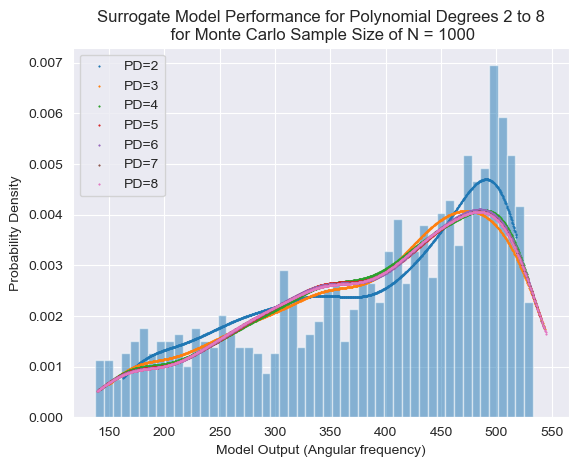

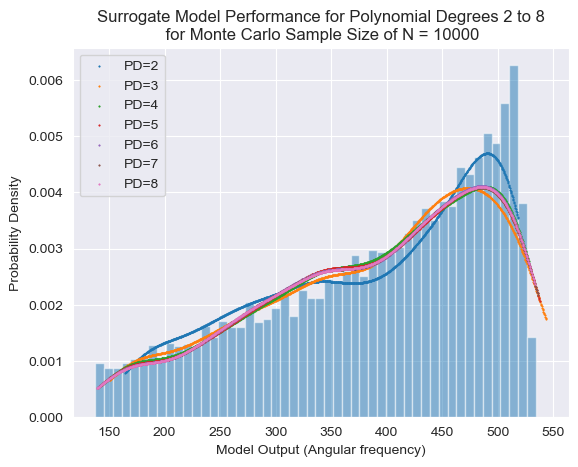

In [54]:
### PLOT SURROGATE PDF CONVERGENCE ###
for i, sample_set in enumerate(bg_size_sample_sets):
    plt.figure()
    plt.hist(sample_set, bins=50, density=True, alpha=0.5)
    for d_o, pdf in enumerate(surrogate_pdf[i]):
        plot_label = 'PD='+str(d_o+order_offset)
        plt.scatter(np.linspace(np.min(surrogate_outputs[i][d_o]), np.max(surrogate_outputs[i][d_o]), 1000), pdf, label=plot_label, s=1, linewidths=0.5)
    plt.xlabel("Model Output (Angular frequency)")
    plt.ylabel("Probability Density")
    title_str = 'Surrogate Model Performance for Polynomial Degrees 2 to 8\n for Monte Carlo Sample Size of N = '+ str(10**(i+2))
    plt.title(title_str)
    plt.legend(loc='best')

In [76]:
N_test = 2000
E_soft_uniform_test_2000 = E_soft_dist.rvs(N_test)
savemat('E_soft_uniform_test_'+str(len(E_soft_uniform_test_2000))+'.mat', {'E_soft': sample_set})

In [78]:
bg_size_uniform_test_2000_file = loadmat('bg_size_uniform_test_2000.mat')
bg_size_uniform_test_2000 = bg_size_uniform_test_2000_file['bg_size'][:]

In [79]:
bg_size_uniform_test_2000_surrogate_outputs = {}
for degree, model in sample_set_surrogates[2].items():
    #print(model, type(model))
    bg_size_uniform_test_2000_surrogate_outputs[degree] = model.predict(E_soft_uniform_test_2000).flatten()

Text(0, 0.5, 'Surrogate Model Output')

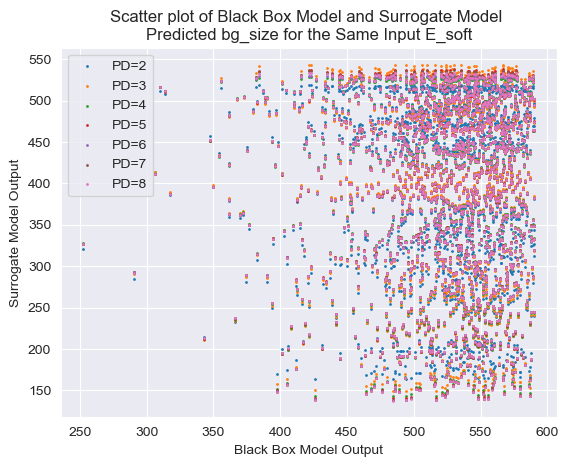

In [93]:
plt.figure()
for degree, predictions in bg_size_uniform_test_2000_surrogate_outputs.items():
    plt.scatter(bg_size_uniform_test_2000, predictions, label=('PD='+str(degree)) ,s=1)

plt.legend(loc='best')
plt.title('Scatter plot of Black Box Model and Surrogate Model \nPredicted bg_size for the Same Input E_soft')
plt.xlabel('Black Box Model Output')
plt.ylabel('Surrogate Model Output')

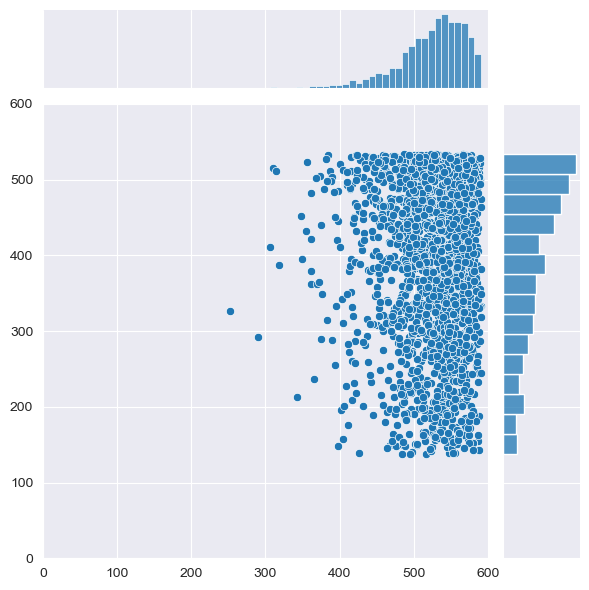

In [95]:
import seaborn as sns

# Create the scatter plot with marginal histograms
sns.jointplot(x=bg_size_uniform_test_2000.flatten(), y=bg_size_uniform_test_2000_surrogate_outputs[8].flatten(), kind='scatter', xlim=(0, 600), ylim=(0, 600))